In [126]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from ggplot import *

In [158]:
input_data = pd.read_csv("C:\Users\Shantan Reddy\Documents\FL1\kmeans_sku_script\Input file.csv")

Average_percentage_margin = input_data.pivot_table(index='Date', columns='Is_True_dash_price', values='Margin',
                                                   aggfunc = np.nanmean)
Average_percentage_margin['Difference'] = Average_percentage_margin['True Dash Price'] - Average_percentage_margin['Boohoo price']
Average_percentage_margin = 100*Average_percentage_margin
Average_percentage_margin  = np.round(Average_percentage_margin,2)
Average_percentage_margin.index.name = 'Date'
Average_percentage_margin.index = pd.to_datetime(Average_percentage_margin.index )


Average_margin = input_data.pivot_table(index='Date', columns='Is_True_dash_price', values='Margin',
                                        aggfunc = lambda x: len(x.dropna()))
Average_margin['Difference'] = Average_margin['True Dash Price'] - Average_margin['Boohoo price']
Average_margin.index.name = 'Date'
Average_margin.index = pd.to_datetime(Average_margin.index)
Average_margin = np.round(Average_margin,2)

Revenue = input_data.pivot_table(index='Parent', columns='Is_True_dash_price', values='Revenue',aggfunc = np.nansum)
Revenue = np.round(Revenue,2)

Categ_review = input_data.pivot_table(index='Parent', columns='Is_True_dash_price', values=['Margin','Revenue'],
                                      aggfunc={'Margin': lambda x:len(x.dropna()),'Revenue':np.nansum},margins = True)
Categ_review['Difference','Margin'] = Categ_review['Margin','True Dash Price'] - Categ_review['Margin','Boohoo price']
Categ_review['Difference','Revenue'] = Categ_review['Revenue','True Dash Price'] - Categ_review['Revenue','Boohoo price']

Categ_review = np.round(Categ_review,2)


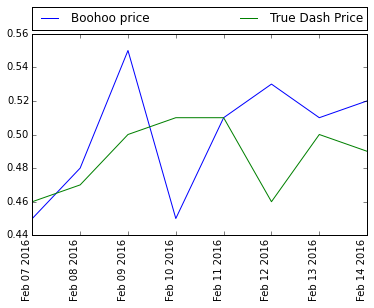

In [181]:
Average_percentage_margin[Average_percentage_margin.columns[0:2]].plot();plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

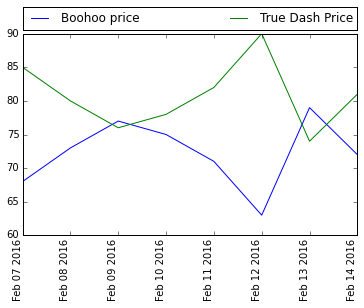

In [182]:
Average_margin[Average_percentage_margin.columns[0:2]].plot();plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

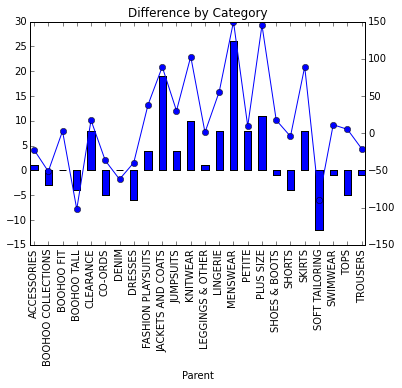

In [195]:
fig = plt.figure()
ax = Categ_review.drop('All')['Difference','Margin'].plot(kind="bar",title = "Difference by Category", label = "Throughput")

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),Categ_review.drop('All')['Difference','Revenue'],marker='o',label = "Revenue")
